# Cryptocurrency Algo-Trading

## From Exploratory Data Analysis to Reproducible Research

<span style="color:white">.</span>


<span style="color:white">.</span>


<span style="color:white">.</span>


Based on a Medium post series:

https://medium.com/@eliquinox/cryptocurrency-data-analysis-part-i-obtaining-and-playing-with-data-of-digital-assets-2a963a72703b

### First some imports

In [34]:
import numpy as np
import pandas as pd

### Data Scraping

Read JSON data directly from REST API

In [35]:
def CryptoDataCSV(symbol, frequency):
    #Params: String symbol, int frequency = 300,900,1800,7200,14400,86400
    #Returns: df from first available date
    url =f'https://poloniex.com/public?command=returnChartData&currencyPair={symbol}&end=9999999999&period={frequency}&start=0'
    df = pd.read_json(url)
    df.set_index('date',inplace=True)
    df.to_csv(f'data/{symbol}.csv')
    print(f'Processed: {symbol}')

In [36]:
tickers = ['USDT_BTC','USDT_BCH','USDT_ETC','USDT_XMR','USDT_ETH','USDT_DASH',
           'USDT_XRP','USDT_LTC','USDT_NXT','USDT_STR','USDT_REP','USDT_ZEC']

In [37]:
for ticker in tickers:
    CryptoDataCSV(ticker, 86400)

Processed: USDT_BTC
Processed: USDT_BCH
Processed: USDT_ETC
Processed: USDT_XMR
Processed: USDT_ETH
Processed: USDT_DASH
Processed: USDT_XRP
Processed: USDT_LTC
Processed: USDT_NXT
Processed: USDT_STR
Processed: USDT_REP
Processed: USDT_ZEC


### Loading back the data

In [38]:
crypto_df = pd.DataFrame()
for ticker in tickers:
    crypto_df[ticker] = pd.read_csv(f'data/{ticker}.csv', index_col = 'date', parse_dates=True)['close']
crypto_df.dropna(inplace=True)

crypto_df.head(n=10)

### Interactive tables with BeakerX

In [39]:
from beakerx import beakerx
beakerx.pandas_display_table() # Not necessary

In [40]:
crypto_df

In [41]:
beakerx.pandas_display_default()

### Bi-directional Excel Integration

Copy a Pandas DataFrame to Excel sheet

In [42]:
import xlwings as xw

sht = xw.Book().sheets[0]
sht.range('A1').value = crypto_df

Copy back the sheet's content

In [43]:
crypto_df_xl = sht.range('A1').options(pd.DataFrame, expand='table').value
crypto_df_xl.head()

USDT_BTC    USDT_BCH   USDT_ETC   USDT_XMR    USDT_ETH  \
date                                                                 
2017-08-14    4186.0  304.950000  14.120005  48.645500  304.000000   
2017-08-15    4149.0  297.900000  13.441999  48.711894  285.470233   
2017-08-16    4381.0  299.154002  14.142925  48.600300  302.099090   
2017-08-17    4262.0  445.100000  13.908999  47.200000  300.010000   
2017-08-18    4090.0  694.000000  13.446596  46.460000  291.899859   

             USDT_DASH  USDT_XRP   USDT_LTC  USDT_NXT  USDT_STR   USDT_REP  \
date                                                                         
2017-08-14  201.677622  0.169565  45.470000  0.110000  0.018201  20.200006   
2017-08-15  202.731759  0.157996  42.793897  0.109193  0.017380  21.213522   
2017-08-16  231.564000  0.160759  43.859363  0.109399  0.017738  21.490000   
2017-08-17  234.500000  0.158000  43.628844  0.108967  0.017295  19.874176   
2017-08-18  222.090233  0.156957  46.489850  0.101130  0.016714  18.950000   

              USDT_ZEC  
date                    
2017-08-14  209.391251  
2017-08-15  212.107997  
2017-08-16  216.610000  
2017-08-17  208.141000  
2017-08-18  199.208000

### Basic Plotting using Matplotlib

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(16, 9))

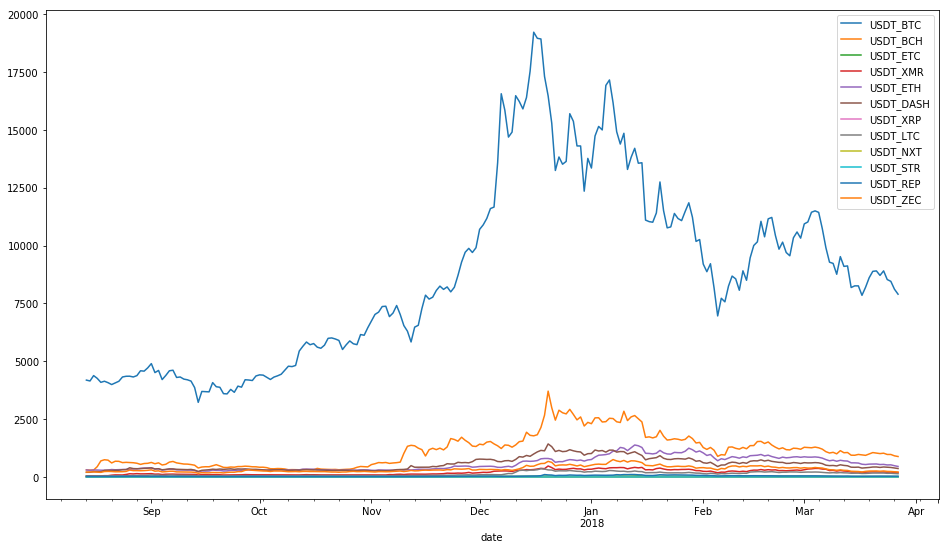

In [45]:
crypto_df.plot()

### Which alt-coin had the best performance?

Let's normalize the prices

In [46]:
crypto_df_norm = crypto_df.divide(crypto_df.iloc[0])

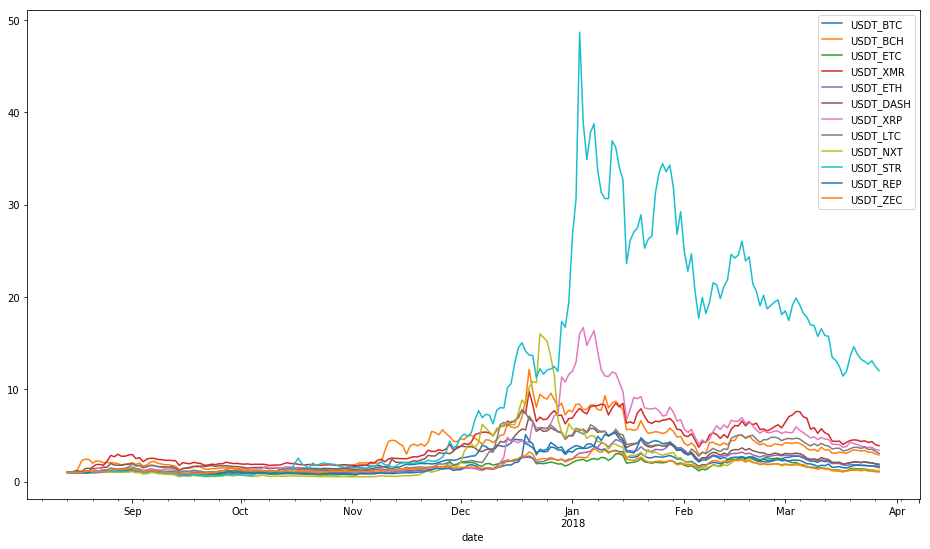

In [47]:
ax = crypto_df_norm.plot()

### Interactive plotting with Plotly and Cufflinks

In [48]:
# import plotly.offline as plotly
# plotly.init_notebook_mode(connected=True)
import cufflinks as cf
cf.set_config_file(offline=True)

In [49]:
crypto_df_norm.iplot()

### Excel Integration - Plotting

Send the rendered plot to Excel

In [50]:
fig = ax.get_figure()
sht.pictures.add(fig, name='Crypto Plot', update=True)

<Picture 'Crypto Plot' in <Sheet [Book2]Sheet1>>

### Market performance in 2018

In [51]:
crypto_df.divide(crypto_df.loc['2018-01-01'])['2018-01-01':].iplot()

### Monthly returns - by calendar months

In [52]:
calendar_month_returns = crypto_df.pct_change().add(1).resample('M').prod()
calendar_month_returns.iplot(kind='bar')

### Monthly (log) returns - rolling windows

In [53]:
rolling_month_log_returns = crypto_df.pct_change().add(1).apply(np.log).rolling(30).sum().dropna()
rolling_month_returns = np.exp(rolling_month_log_returns)
rolling_month_returns.iplot()

### Statistical plots with Seaborn

Simple estimation of each coin's market volatility/risk

In [54]:
import seaborn as sns; sns.set()

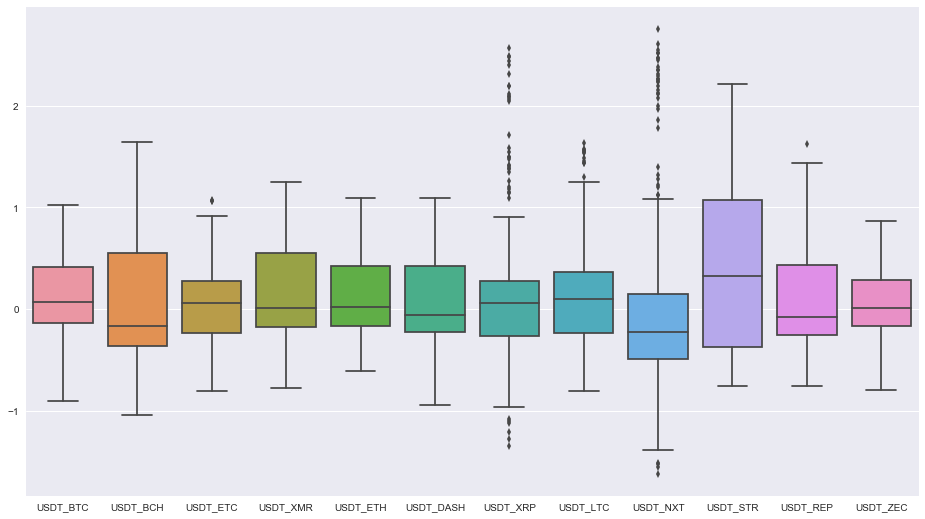

In [55]:
sns.boxplot(data=rolling_month_log_returns)

### Correlation Analysis

In [56]:
crypto_df_pct = crypto_df.pct_change().dropna()
corr = crypto_df_pct.corr()

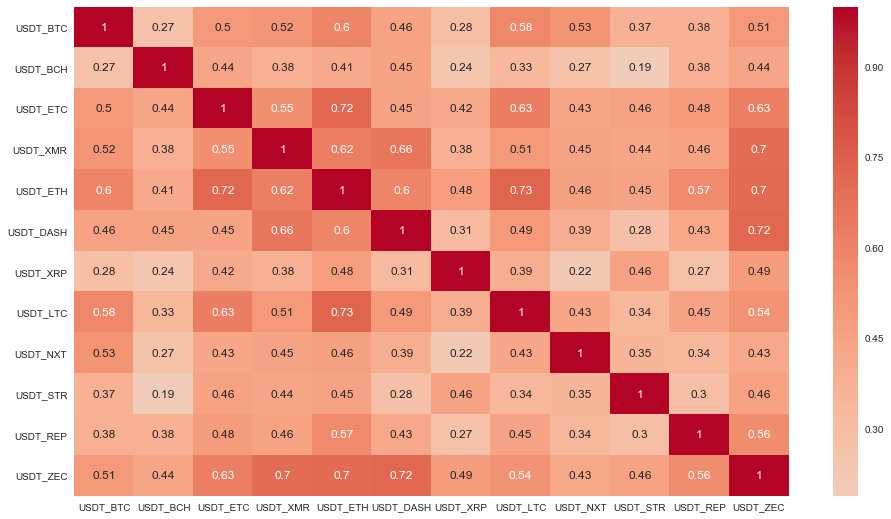

In [57]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, 
            cmap='coolwarm', center=0, annot=True)

### Quick Linear Regression Plot 

In [58]:
corr['USDT_ETH']['USDT_LTC']

0.7287095172749343

/Users/davidas/anaconda/envs/jupyter_slides/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



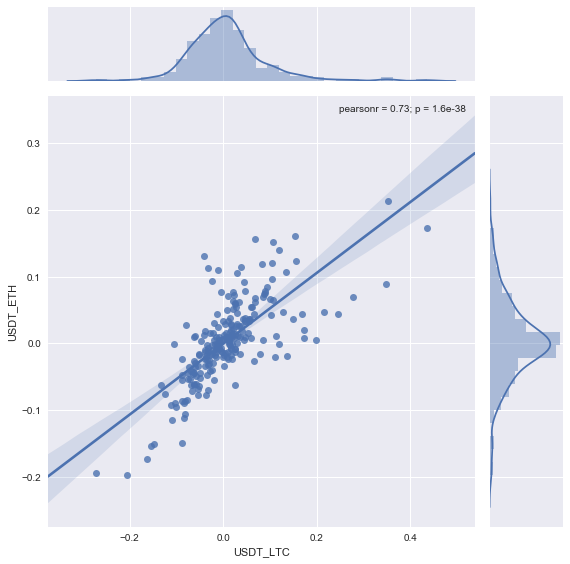

In [59]:
sns.jointplot(crypto_df_pct['USDT_LTC'], crypto_df_pct['USDT_ETH'], kind='reg', size=8)

### Statistical modelling with statsmodels

In [60]:
import statsmodels.api as sm
model = sm.OLS(crypto_df_pct['USDT_ETH'],
               crypto_df_pct['USDT_LTC']).fit()
model.summary()

/Users/davidas/anaconda/envs/jupyter_slides/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               USDT_ETH   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     255.2
Date:                Tue, 27 Mar 2018   Prob (F-statistic):           7.43e-39
Time:                        21:13:46   Log-Likelihood:                 392.04
No. Observations:                 225   AIC:                            -782.1
Df Residuals:                     224   BIC:                            -778.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
USDT_LTC       0.5302      0.033     15.975      0.000       0.465       0.596
==============================================================================
Omnibus:                       11.789   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.995
Skew:                           0.369   Prob(JB):                     0.000336
Kurtosis:                       4.077   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Hello Algo-Trading

### First - let's get some fine-grained data

The API can provide market data with 5 minutes intervals

In [61]:
def CryptoData(symbol, frequency):
    #Params: String symbol, int frequency = 300,900,1800,7200,14400,86400
    #Returns: df from first available date
    url =f'https://poloniex.com/public?command=returnChartData&currencyPair={symbol}&end=9999999999&period={frequency}&start=0'
    df = pd.read_json(url)
    df.set_index('date',inplace=True)
    return df

We would like to create a strategy for investing in the BTC-LTC coin pair

In [62]:
# df = CryptoData(symbol = 'BTC_LTC', frequency = 300)
# df.to_csv('data/BTC_LTC.csv')
df = pd.read_csv('data/BTC_LTC.csv', index_col = 'date', parse_dates=True)
df.head()

close    high     low    open  quoteVolume    volume  \
date                                                                         
2014-01-18 04:25:00  0.0280  0.0280  0.0280  0.0280     0.735363  0.020590   
2014-01-18 04:30:00  0.0290  0.0290  0.0290  0.0290     0.022000  0.000638   
2014-01-18 04:35:00  0.0280  0.0280  0.0280  0.0280     0.043868  0.001228   
2014-01-18 04:40:00  0.0285  0.0285  0.0280  0.0280     0.043868  0.001239   
2014-01-18 04:45:00  0.0285  0.0285  0.0285  0.0285     0.000000  0.000000   

                     weightedAverage  SMA_1000  SMA_5000  
date                                                      
2014-01-18 04:25:00         0.028000       NaN       NaN  
2014-01-18 04:30:00         0.029000       NaN       NaN  
2014-01-18 04:35:00         0.028000       NaN       NaN  
2014-01-18 04:40:00         0.028251       NaN       NaN  
2014-01-18 04:45:00         0.028500       NaN       NaN

## Simple Moving Averages (SMA)

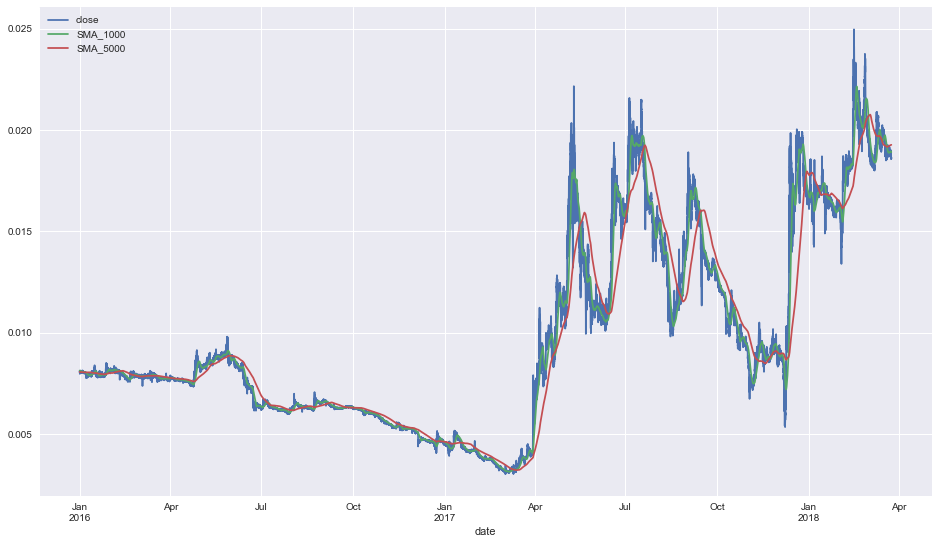

In [63]:
df['SMA_1000'] = df['close'].rolling(1000).mean()
df['SMA_5000'] = df['close'].rolling(5000).mean()
df[['close','SMA_1000','SMA_5000']]['2016-01-01':].plot()

### Our strategy:
1. **BUY** if *Leading* SMA is **above** *Lagging* SMA by some threshold.
2. **SELL** if *Leading* SMA is **below** *Lagging* SMA by some threshold.

In [64]:
def test_strategy(df, lead, lag, pc_thresh = 0.025):
    ma_df = df.copy()
    ma_df['lead'] = ma_df['close'].rolling(lead).mean()
    ma_df['lag'] = ma_df['close'].rolling(lag).mean()
    ma_df.dropna(inplace = True)
    ma_df['lead-lag'] = ma_df['lead'] - ma_df['lag']
    ma_df['pc_diff'] = ma_df['lead-lag'] / ma_df['close']
    ma_df['decision'] = np.where(ma_df['pc_diff'] > pc_thresh, 1, 0)
    ma_df['decision'] = np.where(ma_df['pc_diff'] < -pc_thresh, -1, ma_df['decision'])
    ma_df['Market'] = np.log(ma_df['close'] / ma_df['close'].shift(1))
    ma_df['Strategy'] = ma_df['decision'].shift(1) * ma_df['Market']
    ma_df[['Market','Strategy']] = ma_df[['Market','Strategy']].cumsum().apply(np.exp)
    return ma_df

In [65]:
ma_df = test_strategy(df['2016-01-01':], 1000, 5000).dropna()

What was the overall performance of our strategy?

In [66]:
ma_df[['Market','Strategy']].iloc[-1]

Market      2.358487
Strategy    6.105968
Name: 2018-03-24 12:20:00, dtype: float64

### How many position changes we made?

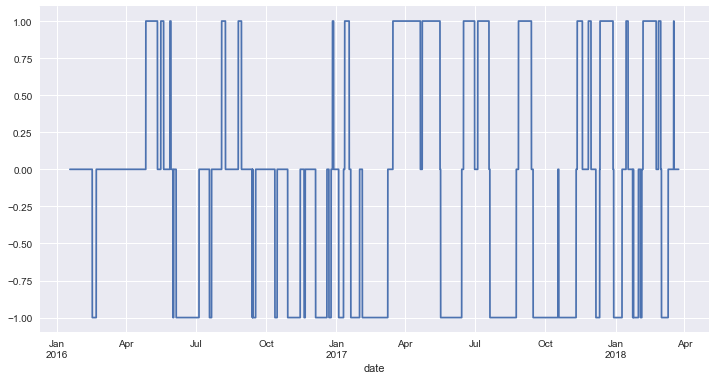

In [67]:
ma_df['decision'].plot(figsize=(12,6))

In [68]:
pos_changes = ma_df['decision'].diff() != 0
sum(pos_changes)

145

Average time between changes:

In [69]:
(ma_df.index.max()-ma_df.index.min())/sum(pos_changes)

Timedelta('5 days 11:46:37.241379')

### But our strategy performance over time is not the best

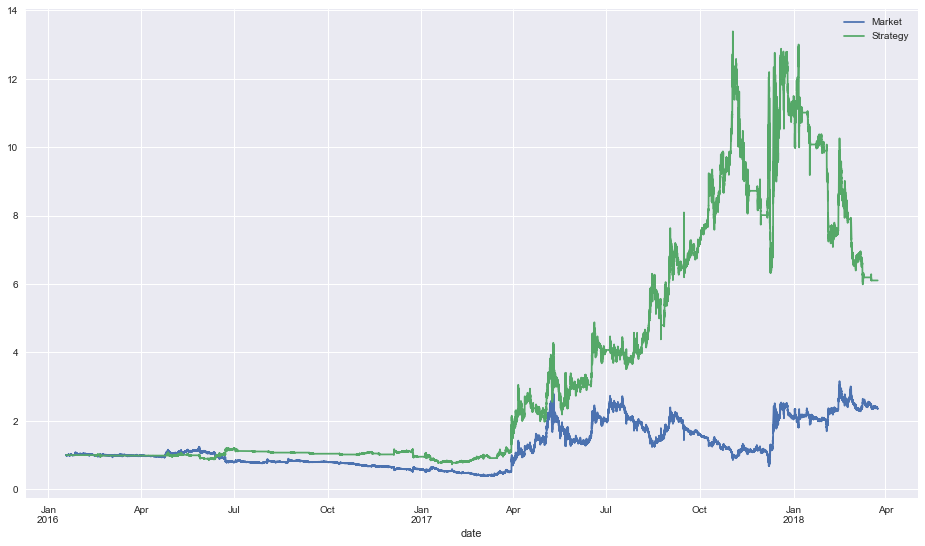

In [70]:
ma_df[['Market','Strategy']].plot()

## Let's search for a better strategy

Simple grid search over the parameters space

In [71]:
import itertools

leads = np.arange(100, 4100, 100)
lags = np.arange(4100, 8100, 100)
lead_lags = itertools.product(leads, lags)
pnls = pd.DataFrame(index=lags,columns = leads)

In [72]:
for lead, lag in lead_lags:
    pnls[lead][lag] = test_strategy(df, lead, lag)['Strategy'][-1]
    print(lead,lag,pnls[lead][lag])

100 4100 0.11252667708182196
100 4200 0.16563131554494578
100 4300 0.12438278471889046
100 4400 0.09443384440739536
100 4500 0.15502145347551619
100 4600 0.22593662487023428
100 4700 0.14485879336040922
100 4800 0.17689909689799235
100 4900 0.2490566282215927
100 5000 0.15739353136886833
100 5100 1.291552007356262
100 5200 1.6395635699095414
100 5300 2.2928382870046042
100 5400 3.584731260114162
100 5500 2.332947127177659
100 5600 2.3583847743326083
100 5700 3.3712361354336546
100 5800 4.55909789166955
100 5900 5.838037568738811
100 6000 7.199908235781576
100 6100 6.469565179962741
100 6200 5.645397289080994
100 6300 4.423723510439373
100 6400 7.051502996550048
100 6500 3.362113064170522
100 6600 5.640754214298542
100 6700 5.637942335030555
100 6800 6.722735878713036
100 6900 5.307864649235641
100 7000 6.552642651364848
100 7100 8.018597362811946
100 7200 6.6675087203053005
100 7300 6.303967916944471
100 7400 7.015886637384494
100 7500 5.536948836378565
100 7600 7.1857552939771985
100 

800 6000 11.095310389043158
800 6100 20.778563052946854
800 6200 17.235552249997927
800 6300 20.516104483509856
800 6400 41.4765200421108
800 6500 23.415523579835558
800 6600 24.06736941441998
800 6700 37.748874054852834
800 6800 28.907366628761963
800 6900 30.485870688120404
800 7000 24.42775411923433
800 7100 34.80005929333676
800 7200 18.60015125440518
800 7300 17.971414646623106
800 7400 27.479011646742514
800 7500 20.9390867609377
800 7600 15.84760934434306
800 7700 12.139180316277445
800 7800 14.124344031135076
800 7900 15.97142034321316
800 8000 18.848430452587188
900 4100 21.59381683797867
900 4200 23.702019245045207
900 4300 19.412385000956586
900 4400 11.03119037373883
900 4500 8.998961763907577
900 4600 12.899957792400016
900 4700 15.19118506864845
900 4800 10.369180845505616
900 4900 11.662650622963238
900 5000 7.3168540830515285
900 5100 4.784642926941311
900 5200 3.3063374520213804
900 5300 6.116932940308853
900 5400 10.776958523000312
900 5500 11.31081184488498
900 5600 

1500 7200 7.0368659977181505
1500 7300 6.809790577123614
1500 7400 4.371246527949429
1500 7500 4.694136249550709
1500 7600 5.498160288134964
1500 7700 4.2157246761938065
1500 7800 3.826029815740582
1500 7900 3.7243209947294518
1500 8000 3.9568366857220094
1600 4100 3.740801481863644
1600 4200 4.394876707707651
1600 4300 2.1439691841193307
1600 4400 1.6799898750685802
1600 4500 1.6352957314481202
1600 4600 2.376016558003083
1600 4700 2.7787131955207904
1600 4800 5.3027133647838545
1600 4900 3.9614432529064127
1600 5000 2.8260159959837527
1600 5100 2.090150411578898
1600 5200 1.6712940062449357
1600 5300 1.4255516770451726
1600 5400 2.004564337312631
1600 5500 2.0018693903011915
1600 5600 3.850215467776047
1600 5700 3.610115368850895
1600 5800 3.435581731314769
1600 5900 2.4128898361510784
1600 6000 2.645260756557826
1600 6100 2.2898540075227527
1600 6200 2.8041300326496947
1600 6300 3.304200558542233
1600 6400 2.358136258222067
1600 6500 3.0266040753970644
1600 6600 5.393796458549552
16

2200 8000 2.839049349465726
2300 4100 0.6538935309822388
2300 4200 1.9355040805784942
2300 4300 2.1432816837589868
2300 4400 2.590577022254826
2300 4500 1.501395504448039
2300 4600 2.8821317855823487
2300 4700 3.667117775780531
2300 4800 5.31885050891284
2300 4900 4.565234526665959
2300 5000 2.0502175431514
2300 5100 3.67262581016011
2300 5200 4.278419407693457
2300 5300 4.935295796460831
2300 5400 2.6728746993534633
2300 5500 4.094739917535297
2300 5600 3.198230288315586
2300 5700 2.68387976477554
2300 5800 1.3341074443219914
2300 5900 1.2275241071123801
2300 6000 1.0998244272857298
2300 6100 1.3752262852729777
2300 6200 0.9638390407724191
2300 6300 0.7100426303807718
2300 6400 0.8892801618391881
2300 6500 0.7074692768293208
2300 6600 1.485147572763079
2300 6700 2.5782232965329754
2300 6800 2.939867674352088
2300 6900 1.2790457144954661
2300 7000 3.379964260054484
2300 7100 3.625940866724499
2300 7200 4.612573474938367
2300 7300 2.344238070321516
2300 7400 2.063185751154925
2300 7500 

3000 4700 0.7648646154148268
3000 4800 1.146792128515099
3000 4900 2.016923758127452
3000 5000 1.7816127265745603
3000 5100 1.7735768759877495
3000 5200 1.8857346987469883
3000 5300 0.7794109131696119
3000 5400 1.265069463049417
3000 5500 2.2437880899005584
3000 5600 4.487394610884375
3000 5700 5.70519872124692
3000 5800 4.109689047022819
3000 5900 4.148282962397594
3000 6000 5.715592376030861
3000 6100 3.16642808457388
3000 6200 1.823241608038955
3000 6300 4.974641402506365
3000 6400 5.078481410614277
3000 6500 5.275754161315325
3000 6600 6.209552272538316
3000 6700 4.603038819398789
3000 6800 4.424711469594911
3000 6900 4.823985535541715
3000 7000 2.007691206508035
3000 7100 4.042948132101563
3000 7200 3.563846341084474
3000 7300 4.2765412654232815
3000 7400 4.687665285364485
3000 7500 3.935915220227633
3000 7600 4.234705630927799
3000 7700 4.636088413315311
3000 7800 1.5480188132270907
3000 7900 1.4548571852309795
3000 8000 1.480366791778344
3100 4100 0.11276497084201459
3100 4200 0

3700 5300 0.2531474365709006
3700 5400 0.3344379307229135
3700 5500 0.34982118564616066
3700 5600 0.24917924252257162
3700 5700 0.166670028645321
3700 5800 0.1435435628809452
3700 5900 2.457786108327244
3700 6000 3.0364098288585626
3700 6100 3.0898751324710365
3700 6200 5.990788732642354
3700 6300 6.436029411723956
3700 6400 5.752036228664891
3700 6500 8.8511330079758
3700 6600 7.340912049088678
3700 6700 11.699658593720885
3700 6800 6.8449933420821045
3700 6900 8.228280782290968
3700 7000 18.960938297775915
3700 7100 11.532252493283124
3700 7200 2.4937863794722963
3700 7300 1.9541906910031253
3700 7400 4.448441898479178
3700 7500 5.602675000793601
3700 7600 7.981694590192475
3700 7700 5.961195425423503
3700 7800 7.305220206208819
3700 7900 9.142312080165967
3700 8000 8.4693491762418
3800 4100 0.13550084053016206
3800 4200 0.09039346527333252
3800 4300 0.05820788322230387
3800 4400 0.08924329745948444
3800 4500 0.04701299908335558
3800 4600 0.05505845867381508
3800 4700 0.0598395846766

### Plotting

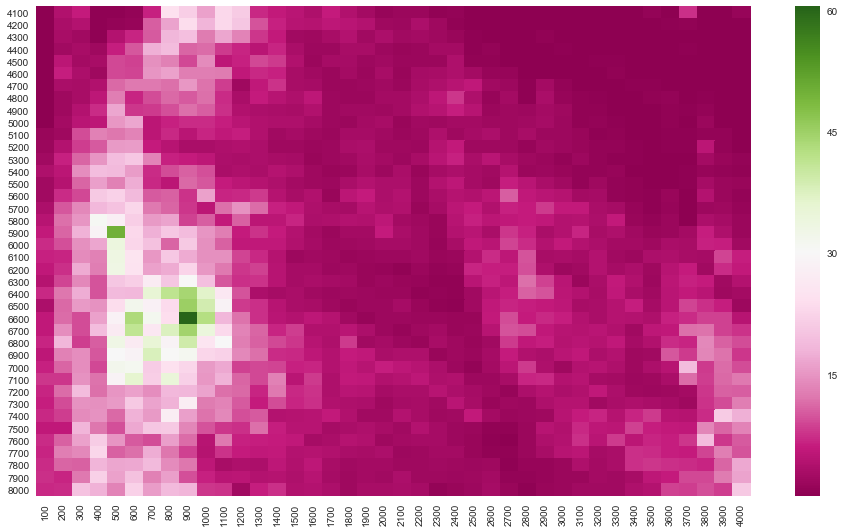

In [73]:
PNLs = pnls[pnls.columns].astype(float)
# plt.subplots()
sns.heatmap(PNLs,cmap='PiYG')

In [74]:
ma_df = test_strategy(df['2016-01-01':], 900, 6600).dropna()

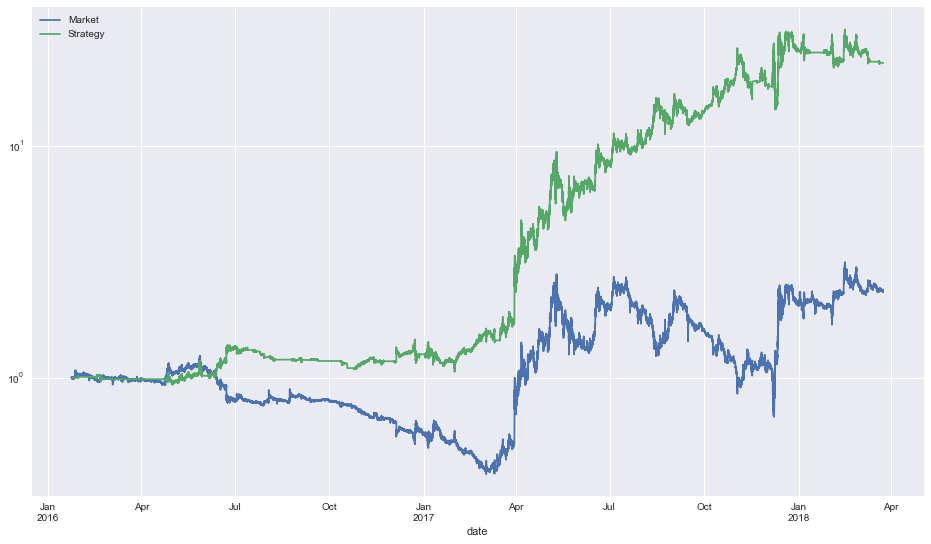

In [75]:
ma_df[['Market','Strategy']].plot(logy=True)

## Assumptions and Issues

* Discussion...